In [ ]:
!sudo apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 데이터 불러오기

In [9]:
df = pd.read_csv('/content/서울시 코로나19 확진자 현황.csv', low_memory=False)
df.head(3)

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


# 데이터 확인 및 전처리

## column 데이터 확인

In [10]:
df.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [11]:
df['조치사항'].unique()

array([nan])

In [12]:
df.isnull().sum()

연번          0
확진일         0
환자번호    99550
국적      99550
환자정보    99550
지역          0
여행력     97833
접촉력         0
조치사항    99550
상태          0
이동경로    89550
등록일         0
수정일         0
노출여부        0
dtype: int64

# 불필요한 column 삭제

In [13]:
df.drop(columns = ['환자번호', '국적', '환자정보', '조치사항', '이동경로', '등록일', '수정일', '노출여부'], inplace=True)
df.head(2)

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-


In [14]:
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

## 확진일의 dtype을 datatime으로 변경

In [18]:
df['확진일'] = pd.to_datetime(df['확진일'])

In [19]:
df.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
상태             object
dtype: object

## 지역 데이터의 공백제거

In [20]:
df['지역'].nunique() #unique의 개수, 서울의 구는 25개, 기타 1개, 타시도 1개

29

In [21]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [22]:
df['지역'] = df['지역'].str.strip()

In [23]:
df['지역'].nunique() #2개의 개수가 줄은 것을 확인

27

In [24]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

## 지역의 dtype을 category로 변경

In [25]:
df['지역'] = df['지역'].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


# 구별 확진자 동향
* 확진일 - 구별 확진자수 집계(pivot t[링크 텍스트](https://)able 만들기)

In [29]:
df_gu = pd.pivot_table(df, values='연번' ,index='확진일', columns='지역', aggfunc='count', margins=True)
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


## 서울시 일별 추가 확진자 동향

In [30]:
s_date = df_gu['All'][:-1]
s_date

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

* 일별 추가 확진자가 많았던 순서

In [32]:
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

* 서울시 일별 추가 확진자 시각화

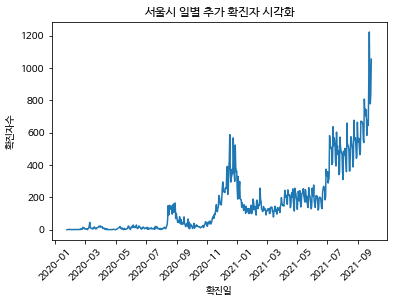

In [35]:
x = s_date.index
y = s_date.values
plt.plot(x, y)
plt.title('서울시 일별 추가 확진자 시각화')
plt.xlabel('확진일')
plt.ylabel('확진자수')
plt.xticks(rotation=45)
plt.show()

* 서울시 지역구별 누적확진자 비교

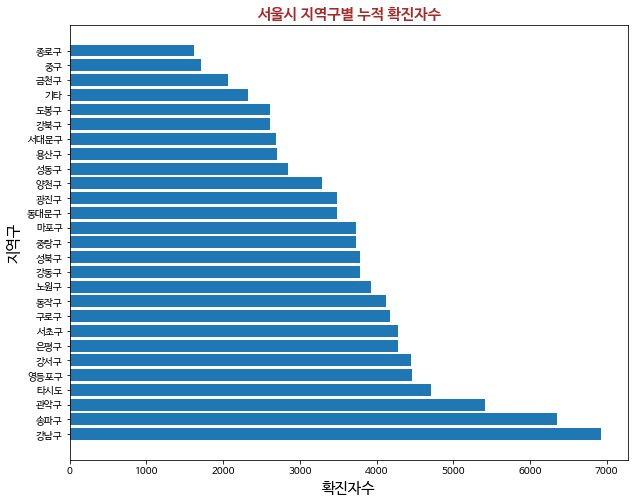

In [61]:
# 강사님 코드
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False)

x = s_gu.index
y = s_gu.values

plt.figure(figsize=(10,8))
plt.barh(x,y)
plt.title('서울시 지역구별 누적 확진자수', size=15, color='brown', weight='bold')
plt.ylabel('지역구', size=15)
plt.xlabel('확진자수', size=15)

plt.show()

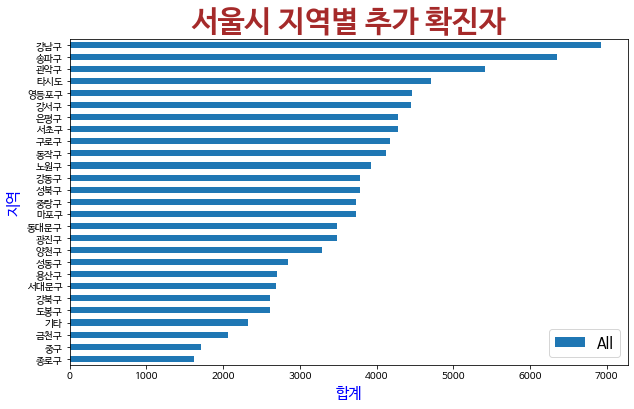

In [57]:
# 직접 한 코드
df_gu.T['All'][:-1].sort_values(ascending=True).plot(kind='barh', stacked=False, figsize=(10,6), width=0.5)

plt.title('서울시 지역별 추가 확진자', size=30, color='brown', weight='bold')
plt.ylabel('지역', size=15, color='blue')
plt.xlabel('합계', size=15, color='blue')
plt.legend(loc='best', fontsize=15)

plt.show()

## 접촉력에 따른 확진자수 best10

In [78]:
df['접촉력'].value_counts()[:10].to_frame() # 데이터 프레임으로 변경

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


## 최근 월 접촉력에 따른 확진건수 best10

* 2021-9

In [96]:
#선생님 코드
df[(df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)]

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
19529,80021,2021-09-01,동작구,NaN,감염경로 조사중,퇴원
19530,80020,2021-09-01,중랑구,NaN,감염경로 조사중,퇴원
19531,80019,2021-09-01,동작구,NaN,기타 확진자 접촉,-
19532,80018,2021-09-01,중랑구,NaN,감염경로 조사중,퇴원


In [94]:
#내 코드
df[df['확진일'] > '2021-08-31']

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
19529,80021,2021-09-01,동작구,NaN,감염경로 조사중,퇴원
19530,80020,2021-09-01,중랑구,NaN,감염경로 조사중,퇴원
19531,80019,2021-09-01,동작구,NaN,기타 확진자 접촉,-
19532,80018,2021-09-01,중랑구,NaN,감염경로 조사중,퇴원


In [95]:
df[df['확진일'] > '2021-08-31']['접촉력'].value_counts()[:10].to_frame()

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
강서구 소재 시장 관련,44
